In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [0]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.datasets import reuters
from keras.preprocessing import sequence



In [4]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [8]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
train_labels[10]

3

## Preparing the data

In [0]:
word_length = 700

In [0]:
train_data = sequence.pad_sequences(train_data, maxlen=word_length)
test_data = sequence.pad_sequences(test_data, maxlen=word_length)



In [0]:
from keras.utils import np_utils

train_labels = np_utils.to_categorical(train_labels, 46)
test_labels = np_utils.to_categorical(test_labels, 46)

## Building our network



## Stacking RNNs  changing dropout

In [13]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

dropout_vary_stacked_lstm = Sequential()
dropout_vary_stacked_lstm.add(Embedding(10000, 64))
dropout_vary_stacked_lstm.add(layers.LSTM(32,dropout=0.3, recurrent_dropout=0.6,return_sequences=True))
dropout_vary_stacked_lstm.add(layers.LSTM(32,dropout=0.3, recurrent_dropout=0.6,return_sequences=True))
dropout_vary_stacked_lstm.add(layers.LSTM(32,dropout=0.3, recurrent_dropout=0.6))
dropout_vary_stacked_lstm.add(layers.Dense(46,activation='softmax'))

dropout_vary_stacked_lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = dropout_vary_stacked_lstm.fit(train_data, train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.3)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 6287 samples, validate on 2695 samples
Epoch 1/30





6287/6287 [==============================] - 137s 22ms/step - loss: 2.8277 - acc: 0.3070 - val_loss: 2.4050 - val_acc: 0.3532
Epoch 2/30
6287/6287 [==============================] - 133s 21ms/step - loss: 2.4202 - acc: 0.3491 - val_loss: 2.2649 - val_acc: 0.3536
Epoch 3/30
6287/6287 [==============================] - 131s 21ms/step - loss: 2.2409 - acc: 0.3496 - val_loss: 2.1371 - val_acc: 0.3551
Epoch 4/30
6287/6287 [==============================] - 132s 21ms/step - loss: 2.0802 - acc: 0.3741 - val_loss: 2.0206 - val_acc: 0.3696
Epoch 5/30
6287/6287 [==============================] - 133s 21ms/step - loss: 1.9601 - acc: 0.4253 - val_loss: 1.8727 - val_acc: 0.4842
Epoch 6/30
6287/6287 [======================

In [14]:
dropout_vary_stacked_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 32)          12416     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 46)                1518      
Total params: 670,574
Trainable params: 670,574
Non-trainable params: 0
_________________________________________________________________


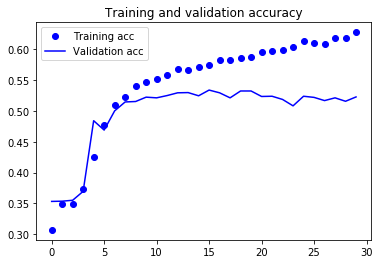

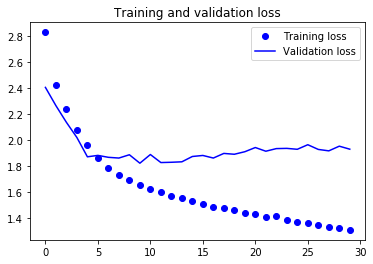

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:

dropout_vary_stacked_lstm = Sequential()
dropout_vary_stacked_lstm.add(Embedding(10000, 64))
dropout_vary_stacked_lstm.add(layers.LSTM(32,dropout=0.3, recurrent_dropout=0.6,return_sequences=True))
dropout_vary_stacked_lstm.add(layers.LSTM(32,dropout=0.3, recurrent_dropout=0.6,return_sequences=True))
dropout_vary_stacked_lstm.add(layers.LSTM(32,dropout=0.3, recurrent_dropout=0.6))
dropout_vary_stacked_lstm.add(layers.Dense(46,activation='softmax'))

dropout_vary_stacked_lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = dropout_vary_stacked_lstm.fit(train_data, train_labels,
                    epochs=16,
                    batch_size=128,
                    validation_split=0.3)
results = dropout_vary_stacked_lstm.evaluate(test_data, test_labels)

Train on 6287 samples, validate on 2695 samples
Epoch 1/16
6287/6287 [==============================] - 131s 21ms/step - loss: 2.8878 - acc: 0.3269 - val_loss: 2.4148 - val_acc: 0.3532
Epoch 2/16
6287/6287 [==============================] - 128s 20ms/step - loss: 2.4278 - acc: 0.3512 - val_loss: 2.3769 - val_acc: 0.3540
Epoch 3/16
6287/6287 [==============================] - 128s 20ms/step - loss: 2.2847 - acc: 0.3582 - val_loss: 2.0662 - val_acc: 0.3673
Epoch 4/16
6287/6287 [==============================] - 127s 20ms/step - loss: 2.0695 - acc: 0.4051 - val_loss: 1.9796 - val_acc: 0.4026
Epoch 5/16
6287/6287 [==============================] - 128s 20ms/step - loss: 1.9423 - acc: 0.4579 - val_loss: 1.8487 - val_acc: 0.5020
Epoch 6/16
6287/6287 [==============================] - 130s 21ms/step - loss: 1.8442 - acc: 0.5028 - val_loss: 1.9054 - val_acc: 0.4801
Epoch 7/16
6287/6287 [==============================] - 132s 21ms/step - loss: 1.7802 - acc: 0.5161 - val_loss: 1.8078 - val_acc: 

In [17]:
results

[1.932011440197273, 0.533837934158152]



## Stacking RNNs increasing number of units and changing dropout






In [18]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

high_unit_dropout_vary_stacked_lstm = Sequential()
high_unit_dropout_vary_stacked_lstm.add(Embedding(10000, 64))
high_unit_dropout_vary_stacked_lstm.add(layers.LSTM(128,dropout=0.3, recurrent_dropout=0.6,return_sequences=True))
high_unit_dropout_vary_stacked_lstm.add(layers.LSTM(128,dropout=0.3, recurrent_dropout=0.6,return_sequences=True))
high_unit_dropout_vary_stacked_lstm.add(layers.LSTM(128,dropout=0.3, recurrent_dropout=0.6))
high_unit_dropout_vary_stacked_lstm.add(layers.Dense(46,activation='softmax'))

high_unit_dropout_vary_stacked_lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = high_unit_dropout_vary_stacked_lstm.fit(train_data, train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.3)

Train on 6287 samples, validate on 2695 samples
Epoch 1/30
6287/6287 [==============================] - 361s 57ms/step - loss: 2.4871 - acc: 0.3396 - val_loss: 2.1051 - val_acc: 0.3707
Epoch 2/30
6287/6287 [==============================] - 351s 56ms/step - loss: 2.0080 - acc: 0.4376 - val_loss: 1.8448 - val_acc: 0.5113
Epoch 3/30
6287/6287 [==============================] - 350s 56ms/step - loss: 1.8112 - acc: 0.5077 - val_loss: 2.1027 - val_acc: 0.4980
Epoch 4/30
6287/6287 [==============================] - 336s 53ms/step - loss: 1.7458 - acc: 0.5263 - val_loss: 1.8102 - val_acc: 0.5332
Epoch 5/30
6287/6287 [==============================] - 350s 56ms/step - loss: 1.7033 - acc: 0.5394 - val_loss: 1.7219 - val_acc: 0.5547
Epoch 6/30
6287/6287 [==============================] - 345s 55ms/step - loss: 1.6450 - acc: 0.5626 - val_loss: 1.7756 - val_acc: 0.5692
Epoch 7/30
6287/6287 [==============================] - 371s 59ms/step - loss: 1.6182 - acc: 0.5666 - val_loss: 1.7355 - val_acc: 

In [19]:
high_unit_dropout_vary_stacked_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_7 (LSTM)                (None, None, 128)         98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, None, 128)         131584    
_________________________________________________________________
lstm_9 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 46)                5934      
Total params: 1,007,918
Trainable params: 1,007,918
Non-trainable params: 0
_________________________________________________________________


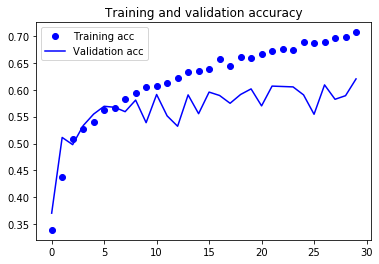

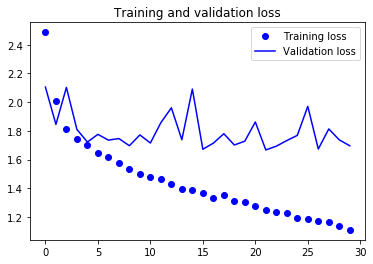

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:


high_unit_dropout_vary_stacked_lstm = Sequential()
high_unit_dropout_vary_stacked_lstm.add(Embedding(10000, 64))
high_unit_dropout_vary_stacked_lstm.add(layers.LSTM(128,dropout=0.3, recurrent_dropout=0.6,return_sequences=True))
high_unit_dropout_vary_stacked_lstm.add(layers.LSTM(128,dropout=0.3, recurrent_dropout=0.6,return_sequences=True))
high_unit_dropout_vary_stacked_lstm.add(layers.LSTM(128,dropout=0.3, recurrent_dropout=0.6))
high_unit_dropout_vary_stacked_lstm.add(layers.Dense(46,activation='softmax'))

high_unit_dropout_vary_stacked_lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = high_unit_dropout_vary_stacked_lstm.fit(train_data, train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.3)
results = high_unit_dropout_vary_stacked_lstm.evaluate(test_data, test_labels)

Train on 6287 samples, validate on 2695 samples
Epoch 1/30
6287/6287 [==============================] - 350s 56ms/step - loss: 2.4312 - acc: 0.3595 - val_loss: 2.4131 - val_acc: 0.3551
Epoch 2/30
6287/6287 [==============================] - 359s 57ms/step - loss: 1.9458 - acc: 0.4630 - val_loss: 1.9094 - val_acc: 0.4586
Epoch 3/30
6287/6287 [==============================] - 362s 58ms/step - loss: 1.7904 - acc: 0.5223 - val_loss: 2.2573 - val_acc: 0.5199
Epoch 4/30
6287/6287 [==============================] - 363s 58ms/step - loss: 1.7560 - acc: 0.5394 - val_loss: 1.7983 - val_acc: 0.5388
Epoch 5/30
6287/6287 [==============================] - 367s 58ms/step - loss: 1.7022 - acc: 0.5456 - val_loss: 1.7646 - val_acc: 0.5540
Epoch 6/30
6287/6287 [==============================] - 370s 59ms/step - loss: 1.6450 - acc: 0.5589 - val_loss: 1.8293 - val_acc: 0.5544
Epoch 7/30
6287/6287 [==============================] - 366s 58ms/step - loss: 1.6033 - acc: 0.5763 - val_loss: 1.8484 - val_acc: 

In [22]:
results

[1.7734851947556833, 0.5863757792160327]

## Stacking RNNs increasing number of units







In [13]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

high_unit_stacked_lstm = Sequential()
high_unit_stacked_lstm.add(Embedding(10000, 64))
high_unit_stacked_lstm.add(layers.LSTM(128,dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
high_unit_stacked_lstm.add(layers.LSTM(128,dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
high_unit_stacked_lstm.add(layers.LSTM(128,dropout=0.2, recurrent_dropout=0.2))
high_unit_stacked_lstm.add(layers.Dense(46,activation='softmax'))

high_unit_stacked_lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = high_unit_stacked_lstm.fit(train_data, train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.3)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 6287 samples, validate on 2695 samples
Epoch 1/30





6287/6287 [==============================] - 424s 67ms/step - loss: 2.3522 - acc: 0.3832 - val_loss: 2.2309 - val_acc: 0.3388
Epoch 2/30
6287/6287 [==============================] - 400s 64ms/step - loss: 1.8509 - acc: 0.4904 - val_loss: 1.7393 - val_acc: 0.5369
Epoch 3/30
6287/6287 [==============================] - 399s 63ms/step - loss: 1.7420 - acc: 0.5349 - val_loss: 1.7517 - val_acc: 0.5388
Epoch 4/30
6287/6287 [==============================] - 399s 63ms/step - loss: 1.7068 - acc: 0.5507 - val_loss: 1.7203 - val_acc: 0.5488
Epoch 5/30
6287/6287 [==============================] - 398s 63ms/step - loss: 1.6092 - acc: 0.5858 - val_loss: 1.6186 - val_acc: 0.5944
Epoch 6/30
6287/6287 [======================

In [14]:
high_unit_stacked_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 128)         98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 128)         131584    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 46)                5934      
Total params: 1,007,918
Trainable params: 1,007,918
Non-trainable params: 0
_________________________________________________________________


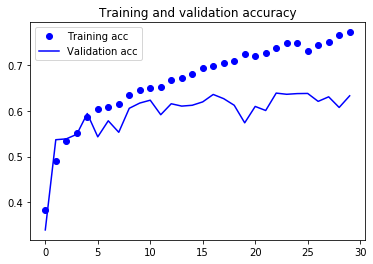

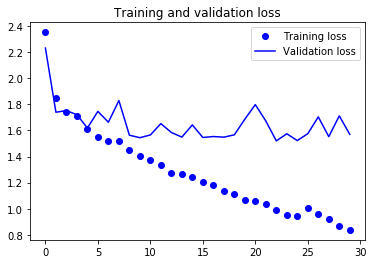

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:


high_unit_stacked_lstm = Sequential()
high_unit_stacked_lstm.add(Embedding(10000, 64))
high_unit_stacked_lstm.add(layers.LSTM(128,dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
high_unit_stacked_lstm.add(layers.LSTM(128,dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
high_unit_stacked_lstm.add(layers.LSTM(128,dropout=0.2, recurrent_dropout=0.2))
high_unit_stacked_lstm.add(layers.Dense(46,activation='softmax'))

high_unit_stacked_lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = high_unit_stacked_lstm.fit(train_data, train_labels,
                    epochs=23,
                    batch_size=128,
                    validation_split=0.3)
results = high_unit_stacked_lstm.evaluate(test_data, test_labels)

Train on 6287 samples, validate on 2695 samples
Epoch 1/23
6287/6287 [==============================] - 397s 63ms/step - loss: 2.3489 - acc: 0.3856 - val_loss: 1.8288 - val_acc: 0.5135
Epoch 2/23
6287/6287 [==============================] - 400s 64ms/step - loss: 1.8718 - acc: 0.4967 - val_loss: 1.9352 - val_acc: 0.4913
Epoch 3/23
6287/6287 [==============================] - 401s 64ms/step - loss: 1.7470 - acc: 0.5325 - val_loss: 1.8066 - val_acc: 0.5469
Epoch 4/23
6287/6287 [==============================] - 404s 64ms/step - loss: 1.6898 - acc: 0.5537 - val_loss: 1.8354 - val_acc: 0.5254
Epoch 5/23
6287/6287 [==============================] - 401s 64ms/step - loss: 1.6237 - acc: 0.5779 - val_loss: 1.7138 - val_acc: 0.5636
Epoch 6/23
6287/6287 [==============================] - 402s 64ms/step - loss: 1.5665 - acc: 0.5927 - val_loss: 1.7095 - val_acc: 0.5941
Epoch 7/23
6287/6287 [==============================] - 413s 66ms/step - loss: 1.5132 - acc: 0.6100 - val_loss: 1.7140 - val_acc: 

In [17]:
results

[1.716234741312844, 0.5761353517894966]